<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/Fourier2D_Estrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import soundfile as sf
import scipy.signal as sig
import scipy
from scipy.fftpack import fft,ifft
from numpy.fft import fft2, fftshift, ifft2

import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # para visualizar imágenes
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


ruta = '/content/drive/Shareddrives/JPDP/2023_1/Vision/'
Max_level = 255
r = np.linspace(0,Max_level,Max_level+1) # posibles entradas

# Transformada de Fourier
La [transformada de Fourier](https://en.wikipedia.org/wiki/Fourier_transform) de una sola dimensión está definida por

\begin{equation}
X(j \omega) = \int_{-\infty}^{\infty} x(t) \, e^{-j \omega t} \; dt
\end{equation}

donde $X(j \omega) = \mathcal{F} \{ x(t) \}$ se usa como notación de la Transformada de Fourier de la señal $x(t)$. $X(j \omega)$ es el espectro de la señal $x(t)$. El argumento $j \omega$, como exponente de la exponencial, encierra el comportamiento de todas las señales oscilatorias $cos(\omega t)$.

La transformada de Fourier podría interpretarse como el "parecido" entre la señal $x(t)$ y  $e^{j \omega t}$, es decir entre $x(t)$ y $cos(\omega t)$.

Se utiliza para analizar señales en dominio de frecuencias $\omega$ en lugar del dominio original $t$.


# Transformada discreta de Fourier

Las señales de dominio discreto $x[k]$ se transforman al dominio de las frecuencias mediante la transformada discreta de Fourier.

La [Transformada discreta de Fourier](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT) de una señal discreta $x[k]$ se define como:

\begin{equation}
X[\mu] = \sum_{k=0}^{N-1} x[k] \; e^{-j \mu \frac{2 \pi}{N} k}
\end{equation}

Donde $N \in \mathbb{N}$ es el tamaño de la DFT y $\mu \in \mathbb{Z}$ es la frecuencia discreta.
La DFT relaciona una señal discreta $x[k]$ con su espectro discreto $X[\mu] = \text{DFT}_N \{ x[k] \}$.
Como $e^{-j \mu \frac{2 \pi}{N} k}$ tiene periodo $N$ respecto a la frecuencia discreta $\mu$, el espectro $X[\mu]$ también tiene periodo $N$.

\begin{equation}
X[\mu] = X[\mu + \nu N] \; \forall \nu \in \mathbb{Z}
\end{equation}

Por lo anterior, solo es necesario analizar el espectro en el rango $\mu = 0,1, \dots, N-1$.

Para los instantes $k = 0,1, \dots, N-1$, la transformada inversa (IDFT) se define como:

\begin{equation}
x[k] = \frac{1}{N} \sum_{\mu=0}^{N-1} X[\mu] \; e^{j \mu \frac{2 \pi}{N} k}
\end{equation}

Como $e^{j \mu \frac{2 \pi}{N} k}$ (IDFT) es periodica  respecto al instante discreto $k$, $x[k] = \text{IDFT}_M \{ X[\mu] \}$ tiene periodo $N$.

\begin{equation}
x[k] = x[k + \nu N]
\end{equation}

## Ejemplo: DFT de sonidos
Se ha hecho una grabación "corta" de un único sonido "largo" tomando muestras con frecuencia $f_s$.

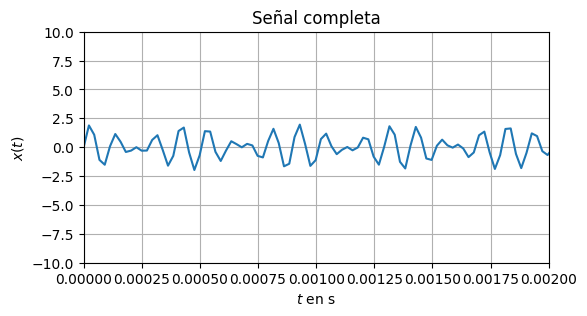

In [ ]:
x, fs = sf.read(ruta + 'JPDP001.wav')# Lee un archivo .wav
x = x.T[0] #Selecciona solo un canal de grabación
t = np.arange(len(x)) / fs
x = np.sin(10000*2*np.pi*t) + np.sin(7800*2*np.pi*t)

plt.figure(figsize=(6,3))
plt.plot(t, x)
plt.xlabel(r'$t$ en s')
plt.ylabel(r'$x(t)$')
plt.axis([0, 0.002, -10, 10]);
plt.grid()
plt.title('Señal completa');

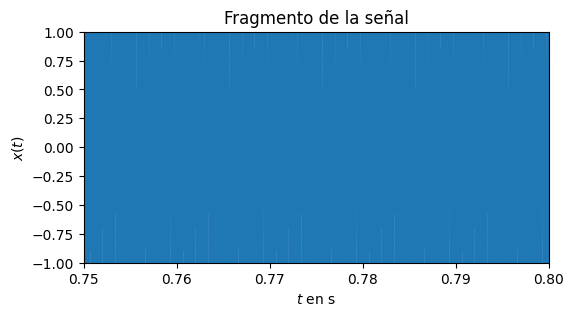

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(t, x)
plt.xlabel(r'$t$ en s')
plt.ylabel(r'$x(t)$')
plt.axis([0, t[-1], -1, 1]);
plt.xlim([0.75,0.8])
plt.grid()
plt.title('Fragmento de la señal');

Se usa la transformada de Fourier para graficar el espectro y analizar.

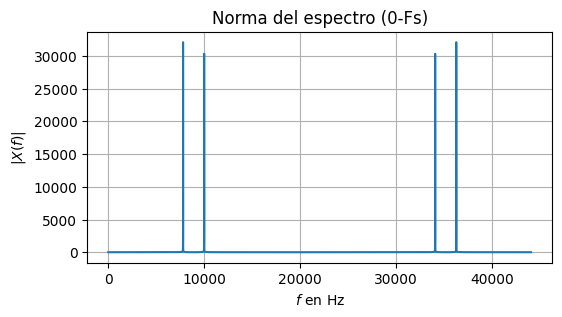

In [ ]:
nel = len(x)
X_fft = fft(x) # calculate fourier transform (complex numbers list)
f = np.linspace(0,fs,nel)

plt.figure(figsize=(6,3))
plt.plot(f,abs(X_fft))
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()
plt.title('Norma del espectro (0-Fs)');

- La norma del espectro es simétrica respecto a la frecuencia $0$.
- La norma del espectro es periódica y tiene periodo $F_s$.
- La norma del espectro es simétrica respecto a la frecuencia  $F_s/2$.



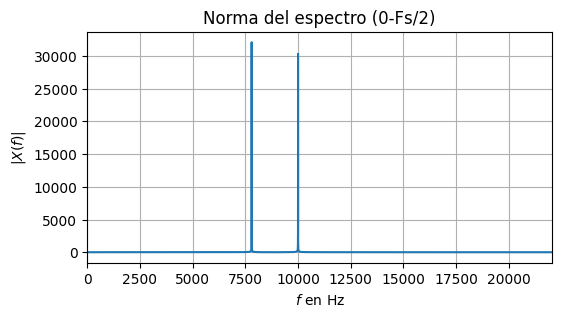

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(f,abs(X_fft))
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()
plt.xlim([0,fs/2])
plt.title('Norma del espectro (0-Fs/2)');

Observe que la señal tiene una importante concentración de información en frecuencias menores a $2500 Hz$

# Imágenes como señales
Una imagen monocromática corresponde a una función que relaciona una ubicación bidimensional $(x,y)$ con la intensidad de luz $I$.

$$I=f(x,y)$$

![https://www.monografias.com/trabajos47/ondas-interferencia/Image2303.gif](https://www.monografias.com/trabajos47/ondas-interferencia/Image2303.gif)

Por su parte, una imagen digital corresponde a una imagen $f(x,y)$ que ha sido discretizada en la ubicación, con un tamaño de píxel $p$, y en la intensidad, con una cantidad determinada de bits.

$$f[r,c]=f(x,y)$$

Cuando se cumpla que $rp=x$ y $cp=y$.

# Transformada de Fourier 2D

In [ ]:
fre = 20
x = np.linspace(-1, 1, 4)
xx, yy = np.meshgrid(x, x)
xx[1,2],yy[1,2]

(0.33333333333333326, -0.33333333333333337)

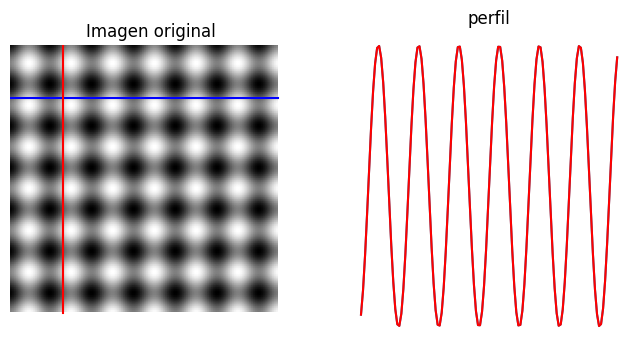

In [ ]:
fre = 20
x = np.linspace(-1, 1, 128)
xx, yy = np.meshgrid(x, x)
img = np.sin(fre*xx) + np.sin(fre*yy) + xx*0
xp= 25
fig, axs = plt.subplots(1, 2, figsize=(8, 4));


axs[0].imshow(img, cmap='gray')
axs[0].plot([0,len(x)],[xp,xp],'b')
axs[0].plot([xp,xp],[0,len(x)],'r')
axs[0].set_title('Imagen original')
axs[0].axis('off')

axs[1].plot(img[:][xp])
axs[1].set_title('perfil')
axs[1].axis('off');

axs[1].plot(img.T[:][xp],'r')
axs[1].set_title('perfil')
axs[1].axis('off');

Observe que en cada posible dirección se tiene una señal de una dimensión que podría analizarse con la transformada de Forier.

La transformada discreta de Fourier 2D de una imagen $x[r,c]$ se define como:

$$X[k,l] =  \sum_{r=0}^{R-1} \sum_{c=0}^{C-1} x[r,c] \; e^{-j k \frac{2 \pi}{R} r} \; e^{-j l \frac{2 \pi}{C} c} $$



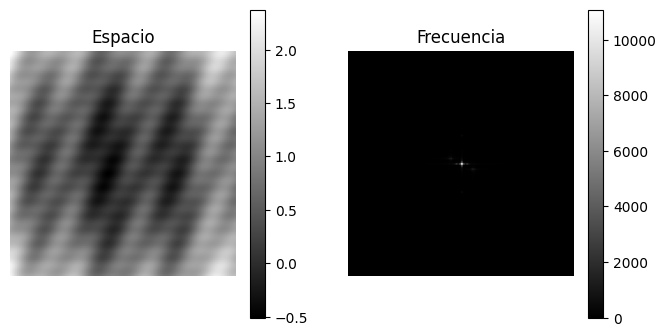

In [ ]:
from matplotlib.pyplot import colorbar
fre = 10
x = np.linspace(-1, 1, 128)
xx, yy = np.meshgrid(x, x)
# img = np.sin(fre*yy) + np.sin(fre*xx) + yy*2
# img = np.sin(fre*yy - 2*fre*xx)
# img = np.sin(5*fre*yy) + 1.5*np.sin(fre*xx)
img = xx**2 + yy**2 + 0.5*(0.4*np.sin(fre*yy + 2*fre*xx) + 0.1*np.sin(5*fre*yy) + 0.6*np.sin(fre*xx) )

img_fft = fftshift(fft2(img))

fig, axs = plt.subplots(1, 2, figsize=(8, 4));

axs[0].set_title('Espacio')
axs[0].axis('off')
im0 = axs[0].imshow(img, cmap='gray')
fig.colorbar(im0);

axs[1].axis('off');
axs[1].set_title('Frecuencia')
im1 = axs[1].imshow(np.abs(img_fft), cmap='gray')

fig.colorbar(im1);



¿Puede interpretar la transformada de Fourier 2D de una imagen real?

Para mejorar la visualización de la transformada de Fourier de una imagen $I$ es coveniente pasar las magnituded a dB.

$$M_{dB} = 20 \log_{10}|\mathcal{F}\{ I \}|$$

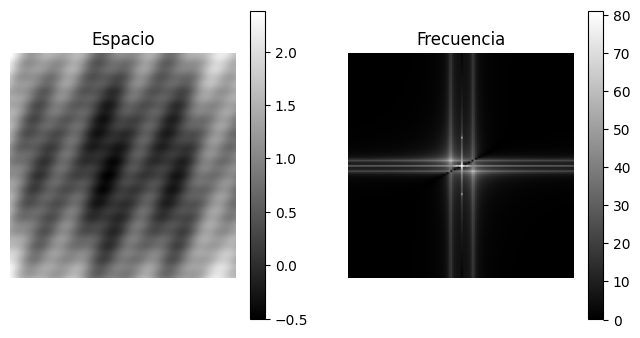

In [ ]:
img_fft_db = 20*np.log10(np.abs(img_fft ) + 1 )


fig, axs = plt.subplots(1, 2, figsize=(8, 4));
axs[0].set_title('Espacio')
axs[0].axis('off')
im0 = axs[0].imshow(img, cmap='gray')
fig.colorbar(im0);

axs[1].axis('off');
axs[1].set_title('Frecuencia')
im1 = axs[1].imshow(img_fft_db, cmap='gray')
fig.colorbar(im1);


# Filtros

Un filtro de frecuencia es una matriz del mismo tamaño que el espectro de Fourier de la imagen, con valores de 0 para las frecuencias que se eliminan, 1 para las frecuencias se mantienen, entre 0 y 1 para las frecuencias que se atenuan y mayores a 1 para las frecuencias que se amplifican.



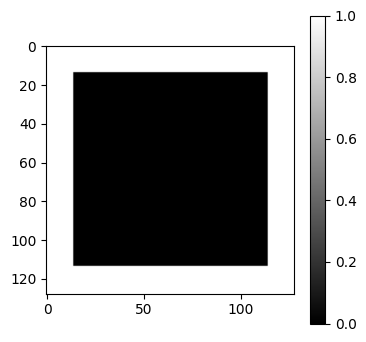

In [ ]:
fc = 50
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
mask = np.ones((rows, cols), np.uint8)
mask[crow-fc:crow+fc, ccol-fc:ccol+fc] = 0

plt.figure(figsize=(4,4))
plt.imshow(mask, cmap='gray')
#plt.axis('off');
colorbar();

Este filtro es una matriz cuadrada con valor 1 en todas las posiciones excepto en un cuadrado de 60x60 píxeles centrado en la imagen, que tiene valores 0. Este filtro eliminará las frecuencias bajas de la imagen.

Aplicar el filtro en el dominio de las frecuencias requiere multiplicar término a término el filtro con el espectro de la imagen.

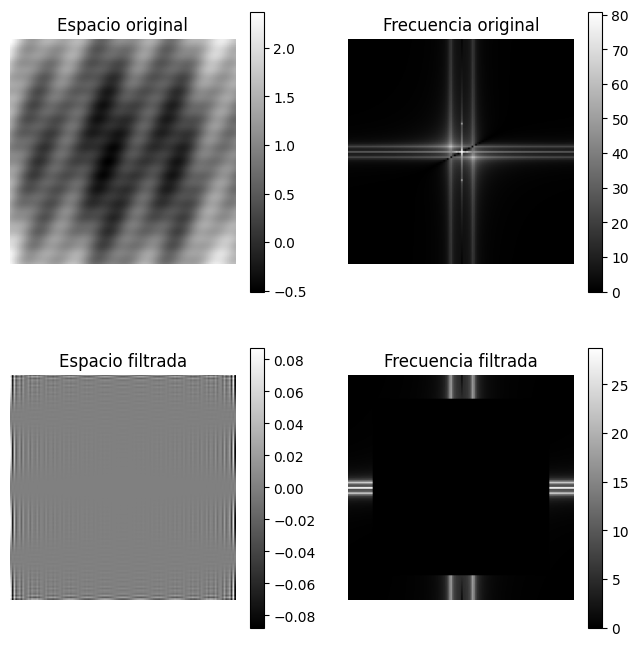

In [ ]:
img_fft_filtrada = img_fft*mask
img_filtrada = np.real(ifft2(fftshift(img_fft_filtrada)))


fig, axs = plt.subplots(2, 2, figsize=(8, 8));

axs[0][0].set_title('Espacio original')
axs[0][0].axis('off')
im00 = axs[0][0].imshow(img, cmap='gray')
fig.colorbar(im00);

axs[0][1].axis('off');
axs[0][1].set_title('Frecuencia original')
im01 = axs[0][1].imshow(img_fft_db, cmap='gray')
fig.colorbar(im01);


axs[1][0].set_title('Espacio filtrada')
axs[1][0].axis('off')
im10 = axs[1][0].imshow(img_filtrada, cmap='gray')
fig.colorbar(im10);

axs[1][1].axis('off');
axs[1][1].set_title('Frecuencia filtrada')
im11 = axs[1][1].imshow(20*np.log10(np.abs(img_fft_filtrada)+1), cmap='gray')
fig.colorbar(im11);

¿Qué tipo de filtro es?

Los filtros pueden ser radiales. A continuación un filtro pasabajas.

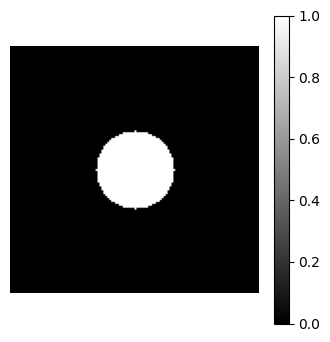

In [ ]:
fc = 20
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
x = np.arange(cols) - ccol
y = np.arange(rows) - crow
xx, yy = np.meshgrid(x, y)
dist = np.sqrt(xx ** 2 + yy ** 2)
mask = np.zeros((rows, cols))
mask[dist <= fc] = 1

plt.figure(figsize=(4,4))
plt.imshow(mask, cmap='gray')
plt.axis('off');
colorbar();

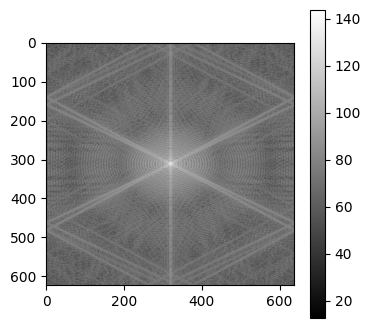

In [ ]:
img = io.imread('/content/drive/Shareddrives/JPDP/2023_1/Vision/ir_01.png')
img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_fft = fft2(img)

fc = 20
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
x = np.arange(cols) - ccol
y = np.arange(rows) - crow
xx, yy = np.meshgrid(x, y)
dist = np.sqrt(xx ** 2 + yy ** 2)
mask = np.zeros((rows, cols))
mask[dist <= fc] = 1

mask = io.imread('/content/drive/Shareddrives/JPDP/2023_1/Vision/mask.jpg')
mask = cv.cvtColor(mask,cv.COLOR_RGB2GRAY)

mask_esp = np.real(fftshift(ifft2(mask)))
plt.figure(figsize=(4,4))

plt.imshow(20*np.log10(abs(fftshift(img_fft))), cmap='gray')
colorbar();

Se aplica el filtro.

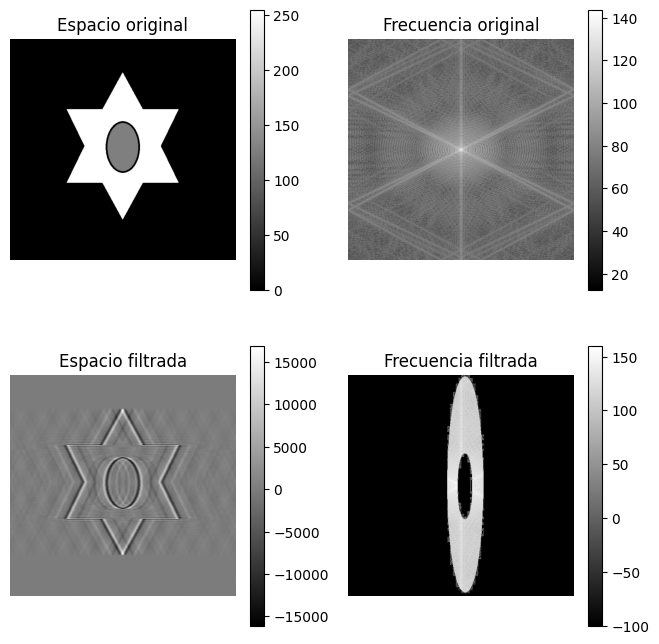

In [ ]:
img_fft_filtrada = fftshift(img_fft)*mask
img_filtrada = np.real(ifft2(fftshift(img_fft_filtrada)))


fig, axs = plt.subplots(2, 2, figsize=(8, 8));

axs[0][0].set_title('Espacio original')
axs[0][0].axis('off')
im00 = axs[0][0].imshow(img, cmap='gray')
fig.colorbar(im00);

axs[0][1].axis('off');
axs[0][1].set_title('Frecuencia original')
im01 = axs[0][1].imshow(20*np.log10(abs(fftshift(img_fft))), cmap='gray')
fig.colorbar(im01);


axs[1][0].set_title('Espacio filtrada')
axs[1][0].axis('off')
im10 = axs[1][0].imshow(img_filtrada, cmap='gray')
fig.colorbar(im10);

axs[1][1].axis('off');
axs[1][1].set_title('Frecuencia filtrada')
im11 = axs[1][1].imshow(20*np.log10(np.abs(img_fft_filtrada+1e-5)), cmap='gray')
fig.colorbar(im11);

Los filtros pueden depender de la orientación.

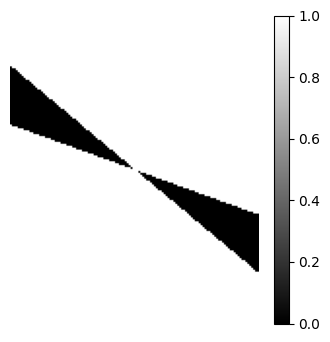

In [ ]:
ori = 30
ancho = 10
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
x = np.arange(cols) - ccol
y = np.arange(rows) - crow
xx, yy = np.meshgrid(x, y)
orients = np.arctan(yy/(xx+1e-10))*180/np.pi
mask = np.ones((rows, cols))
mask[(orients > ori-ancho) & (orients < ori+ancho)] = 0

plt.figure(figsize=(4,4))
plt.imshow(mask, cmap='gray')
plt.axis('off');
colorbar();

Se aplica el filtro.

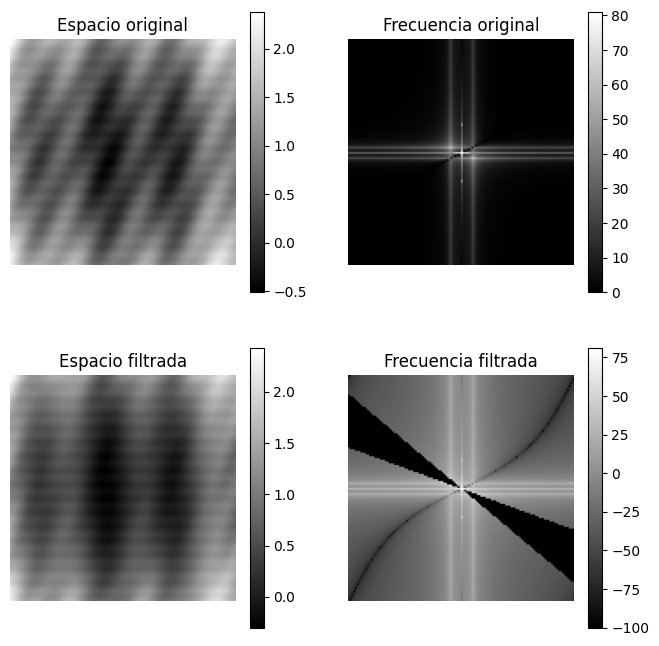

In [ ]:
img_fft_filtrada = img_fft*mask
img_filtrada = np.real(ifft2(fftshift(img_fft_filtrada)))


fig, axs = plt.subplots(2, 2, figsize=(8, 8));

axs[0][0].set_title('Espacio original')
axs[0][0].axis('off')
im00 = axs[0][0].imshow(img, cmap='gray')
fig.colorbar(im00);

axs[0][1].axis('off');
axs[0][1].set_title('Frecuencia original')
im01 = axs[0][1].imshow(img_fft_db, cmap='gray')
fig.colorbar(im01);


axs[1][0].set_title('Espacio filtrada')
axs[1][0].axis('off')
im10 = axs[1][0].imshow(img_filtrada, cmap='gray')
fig.colorbar(im10);

axs[1][1].axis('off');
axs[1][1].set_title('Frecuencia filtrada')
im11 = axs[1][1].imshow(20*np.log10(np.abs(img_fft_filtrada+1e-5)), cmap='gray')
fig.colorbar(im11);

- Diseñeun filtro pasa banda a partir del análisis de una imagen real